# ANN & MNIST

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 968
다음 그림은 숫자 7 입니다.


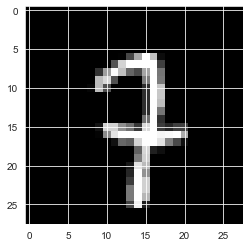

In [19]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [20]:
train_x.shape

(60000, 28, 28)

In [21]:
train_x = train_x.reshape([train_x.shape[0],-1])
test_x = test_x.reshape([test_x.shape[0],-1])

In [22]:
train_x.shape

(60000, 784)

* min-max scaling

In [23]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 255 / min : 0


In [24]:
max_num = train_x.max()

train_x = train_x/max_num
test_x = test_x/max_num

In [25]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [28]:
len_y = len(set(train_y))

In [29]:
train_y.shape

(60000,)

In [30]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [31]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [32]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [50]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer=keras.optimizers.Adam(0.01))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [51]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [53]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3851 - accuracy: 0.8908 - val_loss: 0.3078 - val_accuracy: 0.9197
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.9083 - val_loss: 0.3134 - val_accuracy: 0.9179
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3323 - accuracy: 0.9111 - val_loss: 0.3719 - val_accuracy: 0.9065
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3277 - accuracy: 0.9131 - val_loss: 0.3421 - val_accuracy: 0.9133
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3230 - accuracy: 0.9138 - val_loss: 0.3453 - val_accuracy: 0.9096
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3209 - accuracy: 0.9143 - val_loss: 0.3424 - val_accuracy: 0.9141
Epoch 00006: early stopping


In [54]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 92.09%
테스트 정확도 : 91.97%


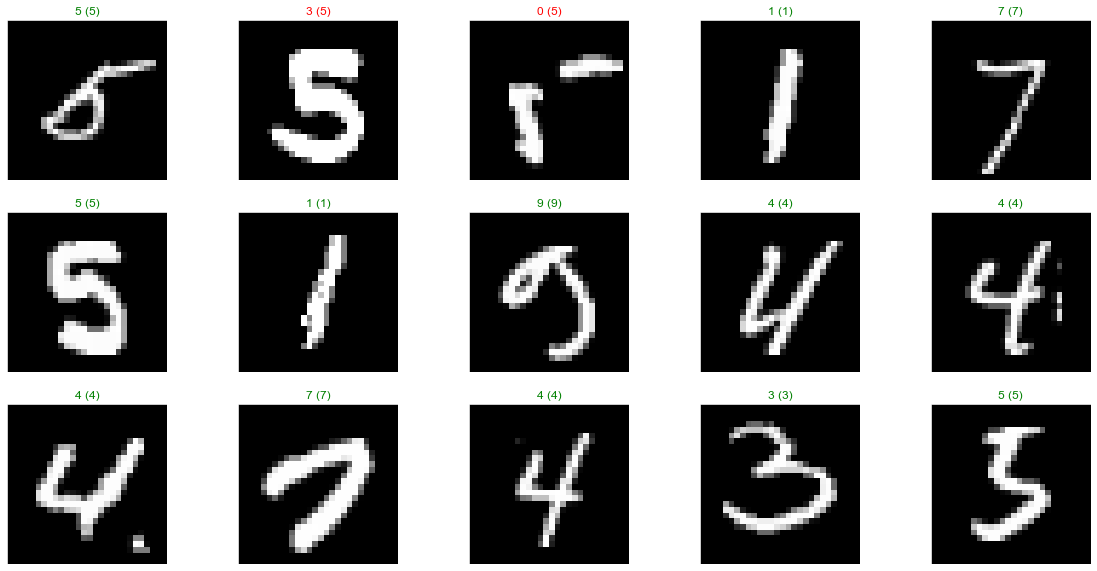

In [55]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 8020
다음 그림은 숫자 1 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  4.  0.  0.  0.  9.  4.  0. 80.  0.]
틀렸어요


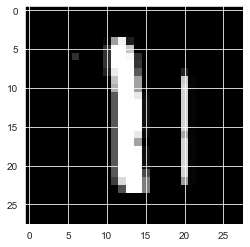

In [39]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [40]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 837us/step - loss: 0.2674 - accuracy: 0.9266


[0.2673686146736145, 0.9265999794006348]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [41]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
keras.backend.clear_session()

model = keras.models.Sequential()

model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )

model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer=keras.optimizers.Adam(0.01))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


- Early Stopping

In [44]:
es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

In [45]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2296 - accuracy: 0.9298 - val_loss: 0.1241 - val_accuracy: 0.9614
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0988 - accuracy: 0.9698 - val_loss: 0.0983 - val_accuracy: 0.9693
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0703 - accuracy: 0.9782 - val_loss: 0.0832 - val_accuracy: 0.9762
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.1108 - val_accuracy: 0.9698
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0935 - val_accuracy: 0.9763
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0955 - val_accuracy: 0.9762
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0974 - val_accuracy:

In [46]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

트레이닝 정확도 : 98.56%
테스트 정확도 : 97.73%


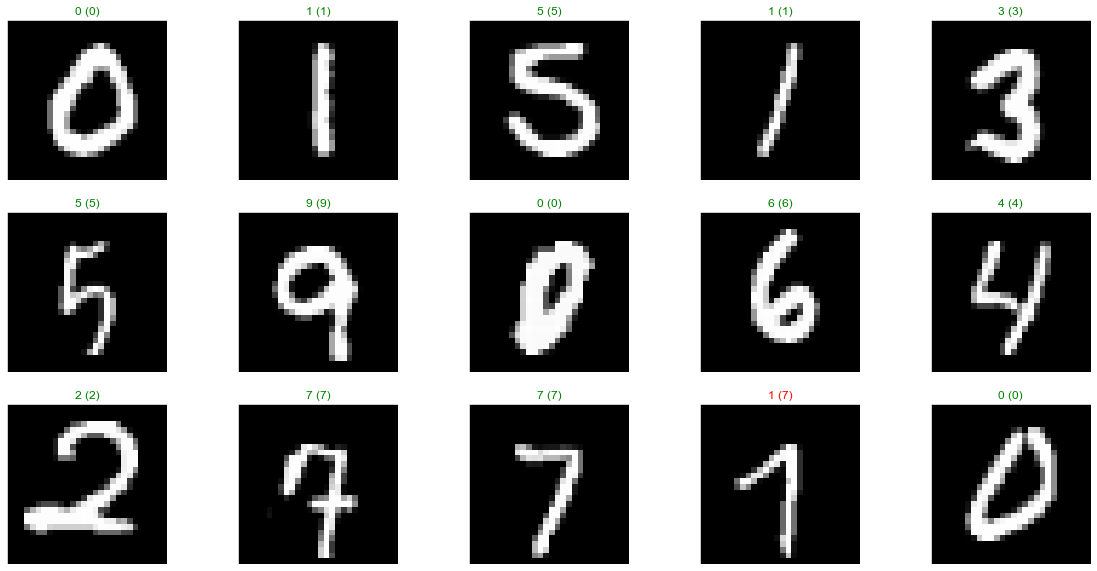

In [47]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 5331
다음 그림은 숫자 1 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 99.  0.  0.  0.]
틀렸어요


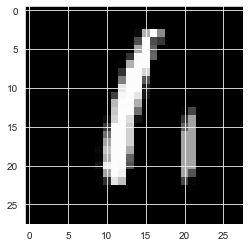

In [48]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [49]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 0s 876us/step - loss: 0.0780 - accuracy: 0.9773


[0.07795660942792892, 0.9772999882698059]